51
[1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 200, 220, 240]
[0, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 29, 30, 31, 33, 34, 35, 37, 38, 39, 41, 42, 43, 45, 46, 47, 49, 50, 51, 53, 54, 55, 57, 58, 59, 61, 62, 63, 65, 66, 67, 69, 70, 71, 73, 74, 75, 77, 78, 79, 81, 82, 83, 85, 86, 87, 89, 90, 91, 93, 94, 95, 97, 98, 99, 101, 102, 103, 105, 106, 107, 109, 110, 111, 113, 114, 115, 117, 118, 119, 121, 122, 123, 125, 126, 127, 129, 130, 131, 133, 134, 135, 137, 138, 139, 141, 142, 143, 145, 146, 147, 149, 150, 151, 153, 154, 155, 157, 158, 159, 161, 162, 163, 165, 166, 167, 169, 170, 171, 173, 174, 175, 177, 178, 179, 181, 182, 183, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

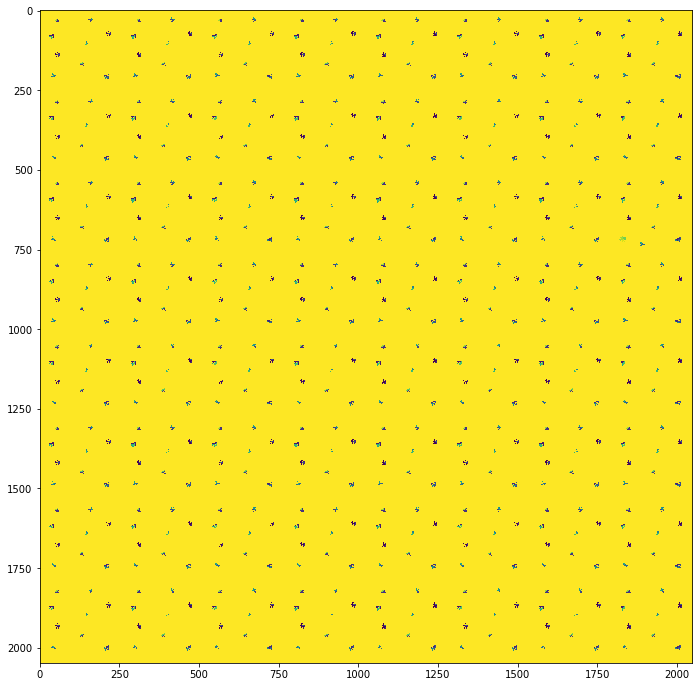

In [225]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
# import imageio as imio
import PIL.Image as pi
import opensimplex as sim

used = [200, 220, 240, 1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188]
print(len(used))
print(sorted(used))
complete = [x for x in range(256)]
print(list(filter(lambda x: x not in used, complete)))


# im = imio.imread('D:\steam\steamapps\common\SpaceEngineers\Content\Data\PlanetDataFiles\EarthLike\\front_mat.png')
im = pi.open('D:\steam\steamapps\common\SpaceEngineers\Content\Data\PlanetDataFiles\Moon\\up_mat.png')
print(im.mode)
data = np.asarray(im)
blue = data[...,2]
print(blue.shape)
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(blue[:,:])
hist = np.array([0] * 256)
for b in blue.reshape([-1]):
    hist[b] += 1
hist, counts = np.unique(blue, return_counts=True)
print(hist)
print(counts)
hist = {i:v for i,v in zip(hist, counts)}
print(hist)
print(2048 * 2048 - hist[255])

def count_resource(resource, values):
    accum = 0
    for res in values:
        print(res, hist.get(res, 0))
        accum += hist.get(res, 0)
    print(resource + ':', accum)
    
count_resource('iron', (1, 4, 8, 12, 16, 20))
count_resource('nickel', (24, 28, 32, 36, 40, 44))
count_resource('silicon', (48, 52, 56, 60, 64, 68))
count_resource('cobalt', (72, 76, 80, 84, 88, 92, 156, 160, 164))
count_resource('silver', (96, 100, 104, 108, 112, 116))
count_resource('magnesium', (120, 124, 128))
count_resource('ice', (132, 136, 140, 144, 148, 152))
count_resource('gold', (168, 172, 176, 180, 184, 188))

In [204]:
osm = sim.OpenSimplex()
height = 2048
width = 2048
add_freqs = (3, 5, 7)
small_sub_freqs = (11, 15, 23)
med_sub_freqs=(15, 23, 31)
large_sub_freqs = (23, 31, 43)
add_values = ((-70, 220), (-30, 50), (100, 88))
addmap = np.zeros((len(add_values), height, width), dtype=np.float)
submap = np.zeros((height, width), dtype=np.float)

for f in sub_freqs:
    for y in range(height):
        for x in range(width):
            submap[x, y] += osm.noise2d(x/f, y/f)
resultmaps = list()   
for iv, v in enumerate(add_values):
    for f in add_freqs:
        for y in range(height):
            for x in range(width):
                 addmap[iv, x, y] += osm.noise2d((x+v[0])/f, (y+v[1])/f)

    preresult = addmap[iv,...] - submap
    preresult = np.interp(preresult, (preresult.min(), preresult.max()), (0, 1))
    resultmaps.append(preresult)
resultmap = np.stack(resultmaps)
print(resultmap.min(), resultmap.max())
# noisemap /= len(freqs)
# print(noisemap.min(), noisemap.max())
# distmap = np.zeros((height, width), dtype=np.float)
# for y in range(height):
#     yoff = y - 15
#     for x in range(width):
#         xoff = x - 15
#         distmap[y,x] += math.sqrt(xoff**2 + yoff**2)

# distmap /= distmap.max()
# mergedmap = noisemap - distmap
# mergedmap = np.interp(mergedmap, (mergedmap.min(), mergedmap.max()), (0, 1))
# print(mergedmap.min(), mergedmap.max())



0.0 1.0


In [ ]:
def estimate_thresholds(src):
    thresholds = list()
    fsrc = np.reshape(src, (src.shape[0], -1))
    for i in range(fsrc.shape[0]):
        ssrc = np.sort(fsrc[i, ...])
        print(ssrc[-6000])
        thresholds.append(ssrc[-6000])
    return thresholds

def threshold(src):
    thresholds = estimate_thresholds(src)
    old_shape = src.shape
    fsrc = np.reshape(src, (old_shape[0],-1))
    print(fsrc.shape)
    dst = np.zeros_like(fsrc)
    for ci, cv in enumerate(thresholds):
        dst[ci,...] = np.fromiter((y if y > cv else 0 for y in fsrc[ci,...]), dtype=src.dtype)
    return dst.reshape(old_shape)

# estimate_thresholds(resultmap)
# thresholds = [0.82, 0.83, 0.81]
# print(thresholds)
# qresultmap = threshold(resultmap, thresholds)
qresultmap = threshold(resultmap)
print('sum:', qresultmap.reshape((-1)).sum())
print(qresultmap.min(), resultmap.max())
print(qresultmap.shape)
print(qresultmap[0,...].sum(), qresultmap[1,...].sum(), qresultmap[2,...].sum())
finalmap = np.zeros(qresultmap.shape[1:],dtype=np.uint8)
for y in range(qresultmap.shape[2]):
    for x in range(qresultmap.shape[1]):
        value = 0
        for v in range(1, qresultmap.shape[0]):
            if qresultmap[v,x,y] > qresultmap[value,x,y]:
                value = v
        finalmap[x,y] = 0 if qresultmap[value,x,y] == 0 else value + 1
        
print(finalmap.sum())
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(finalmap)
# ax[0,0].imshow(finalmap[:,:])
# ax[0,1].imshow(submap)
# ax[1,0].imshow(resultmap[1,...])
# ax[1,1].imshow(resultmap[2,...])

In [ ]:
plt.hist(finalmap.reshape((-1)), bins=4)

In [3]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as pi
import opensimplex as sim
def get_sub_noise(height, width, octaves):

    osm = sim.OpenSimplex()
    submaps = np.zeros((len(octaves), height, width), dtype=np.float)
    for oi, o in enumerate(octaves):
        print(o)
        for y in range(height):
            for x in range(width):
                submaps[oi, x, y] += osm.noise2d(x/o, y/o)
    submapdict = {o: submaps[oi] for oi, o in enumerate(octaves)}
    return submapdict    

def generate_offsets(value_count, octave_count, size):
    import random
    random.seed(1234)
    rng = lambda: random.randint(0, size)
    offsets = list()
    for i in range(value_count):
        offset = tuple((rng(), rng()) for _ in range(octave_count))
        offsets.append(offset)

    return offsets

def get_ore_map(height, width, worldmap_dict, add_octaves, sub_octaves, amplitudes, offsets):
    result = np.zeros((height, width), dtype=np.float)
    for oi, o in enumerate(add_octaves):
        ofs = offsets[oi]
        result += worldmap_dict[o][ofs[0]:ofs[0]+height, ofs[1]:ofs[1]+width] * amplitudes[oi]
    for oi, o in enumerate(sub_octaves):
        ofs = offsets[oi]
        result -= worldmap_dict[o][ofs[0]:ofs[0]+height, ofs[1]:ofs[1]+width] * amplitudes[oi]
        #result -= worldmap_dict[o][:height,:width] * amplitudes[oi] * 0.5
    return np.interp(result, (result.min(), result.max()), (0, 1))

def estimate_threshold(src, threshold_count):
    fsrc = np.reshape(src, (-1,))
    ssrc = np.sort(fsrc)
    return ssrc[-threshold_count - 1]

def threshold(src, threshold_count):
    threshold = estimate_threshold(src, threshold_count)
    old_shape = src.shape
    fsrc = np.reshape(src, (-1,))
    dst = np.zeros_like(fsrc)
    dst = np.fromiter((y if y > threshold else 0 for y in fsrc), dtype=src.dtype)
    return dst.reshape(old_shape)

def consolidate_maps(src):
    finalmap = np.zeros(src.shape[1:],dtype=np.uint8)
    for y in range(src.shape[2]):
        for x in range(src.shape[1]):
            value = 0
            for v in range(1, src.shape[0]):
                if src[v, x, y] > src[value, x, y]:
                    value = v
            finalmap[x,y] = 255 if src[value, x, y] == 0 else value
    return finalmap

def save_noise(name, sub_noise):
    persist_map = {str(k):v for k,v in sub_noise.items()}
    np.savez(name, **persist_map)

def load_noise(name):
    #loaded = np.load('sub_noise.npz')
    loaded = np.load(name)
    sub_noise = {int(k):v for k,v in loaded.items()}
    return sub_noise

octaves: (7, 13, 19, 27, 35, 51, 63)
generate ores
sub_octaves: (35, 51, 63)
20 20
0 - ore_offset: ((1805, 478), (30, 371), (143, 343))
1 - ore_offset: ((403, 1452), (969, 71), (126, 64))
2 - ore_offset: ((1417, 1983), (1898, 608), (373, 749))
3 - ore_offset: ((468, 59), (1993, 1023), (264, 1908))
4 - ore_offset: ((280, 364), (188, 1104), (258, 1238))
5 - ore_offset: ((1970, 1455), (1091, 1020), (819, 1857))
6 - ore_offset: ((79, 289), (23, 1366), (588, 1936))
7 - ore_offset: ((1545, 684), (221, 312), (2033, 671))
8 - ore_offset: ((308, 881), (590, 111), (1418, 454))
9 - ore_offset: ((578, 1250), (1860, 162), (1704, 1133))
10 - ore_offset: ((164, 726), (1112, 633), (1229, 633))
11 - ore_offset: ((1902, 168), (1581, 1431), (2031, 1399))
12 - ore_offset: ((1917, 1949), (185, 1928), (696, 1800))
13 - ore_offset: ((1793, 1211), (1126, 507), (760, 1705))
14 - ore_offset: ((1786, 489), (422, 1987), (1543, 1046))
15 - ore_offset: ((784, 1414), (443, 643), (1103, 634))
16 - ore_offset: ((1325,

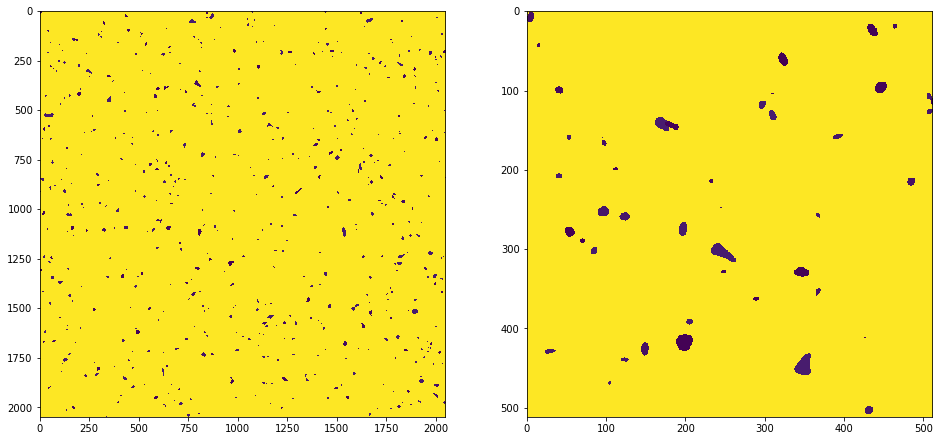

In [226]:
def generate_world_map(gen_noise=False):
    
    world_octaves = (7, 13, 19, 27, 35, 51, 63)
    gen_height = 4096
    gen_width = 4096
#    ore_count = 64
    print('octaves:', world_octaves)

    if gen_noise:
        world_noise = get_sub_noise(gen_height, gen_width, world_octaves)
        save_noise('seven_octaves.npz', world_noise)
    else:
        world_noise = load_noise('seven_octaves.npz')

    print('generate ores')
#     rows = (len(world_noise) // 3) + (0 if len(world_noise) % 3 == 0 else 1)
#     a = 0
#     fig, ax = plt.subplots(rows, 3, figsize=(15, 5 * rows))
#     for v in world_noise.keys():
#         ax[a // 3, a % 3].imshow(world_noise[v])
#         a += 1

    height = gen_height // 2
    width = gen_width // 2
#     threshold_count = 5000
    small_octaves = world_octaves[0:2]
    medium_octaves = world_octaves[1:3]
    large_octaves = world_octaves[2:4]
    sub_octaves = world_octaves[-3:]
    print('sub_octaves:', sub_octaves)
    amplitudes = (0.5, 1, 1)
    ores = (
        #iron
        (1, small_octaves, 6000), (4, small_octaves, 6000), (8, small_octaves, 6000),
        (12, medium_octaves, 4000), (16, medium_octaves, 4000), (20, medium_octaves, 4000),
        (21, large_octaves, 3000), (22, large_octaves, 3000),
        #nickel
        (24, small_octaves, 5500), (26, small_octaves, 5500), (28, small_octaves, 5500),
        (30, medium_octaves, 3800), (32, medium_octaves, 3800), (34, medium_octaves, 3800),
        (35, large_octaves, 2900), (36, large_octaves, 2900),
        #silicon
        (48, small_octaves, 6500), (50, small_octaves, 6500), (52, small_octaves, 6500),
        (54, medium_octaves, 4500), (56, medium_octaves, 4500), (58, medium_octaves, 4500),
        (59, large_octaves, 2000), (60, large_octaves, 2000),
        #cobalt
        (72, small_octaves, 4000), (76, small_octaves, 4000), (80, small_octaves, 4000),
        (84, medium_octaves, 3800), (88, medium_octaves, 3800), (92, medium_octaves, 3800),
        (93, large_octaves, 2400), (94, large_octaves, 2400),
        #magnesium
        (96, small_octaves, 6500), (98, small_octaves, 6500), (102, small_octaves, 6500),
        (104, medium_octaves, 2000), (106, medium_octaves, 2000), (108, medium_octaves, 2000),
        (109, large_octaves, 1600), (110, large_octaves, 1600),
        #silver
        (120, small_octaves, 3500), (121, small_octaves, 3500),
        (122, medium_octaves, 4000), (123, medium_octaves, 4000),
        (124, large_octaves, 2000), (125, large_octaves, 2000),
        #gold
        (168, small_octaves, 3500), (172, small_octaves, 3500),
        (176, medium_octaves, 4000), (180, medium_octaves, 4000),
        (184, large_octaves, 2000), (188, large_octaves, 2000),
        #uranium
        (164, medium_octaves, 3000), (165, large_octaves, 3000),
        #platinum
        (156, medium_octaves, 2500), (158, large_octaves, 2800),
        #ice
        (132, small_octaves, 6000), (134, small_octaves, 6000), (136, small_octaves, 6000),
        (138, medium_octaves, 6000), (140, medium_octaves, 6000), (142, medium_octaves, 6000),
        (143, large_octaves, 10000), (144, large_octaves, 10000),
    )
    
    offsets = generate_offsets(len(ores), len(amplitudes), height)
    print(len(offsets), len(ores))
    ore_maps = list()
    for oi, ore_offset in enumerate(offsets):
        ore = ores[oi]
        print('{} - ore_offset: {}'.format(oi, ore_offset))
        ore_map = get_ore_map(height, width, world_noise, ore[1], sub_octaves, amplitudes, ore_offset)
        t_ore_map = threshold(ore_map, ore[2])
        ore_maps.append(t_ore_map)
    print('stacking')
    ore_maps = np.stack(ore_maps)
    print('consolidating')
    final_map = consolidate_maps(ore_maps)
    print('final_map.shape:', final_map.shape)
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].imshow(final_map)
    ax[1].imshow(final_map[:512, :512])
    print(np.count_nonzero(final_map))
    unique, counts = np.unique(final_map, return_counts=True)
    print(unique, counts)
    print(height * width - counts[-1])
    return world_noise
    
world_noise = generate_world_map(False)


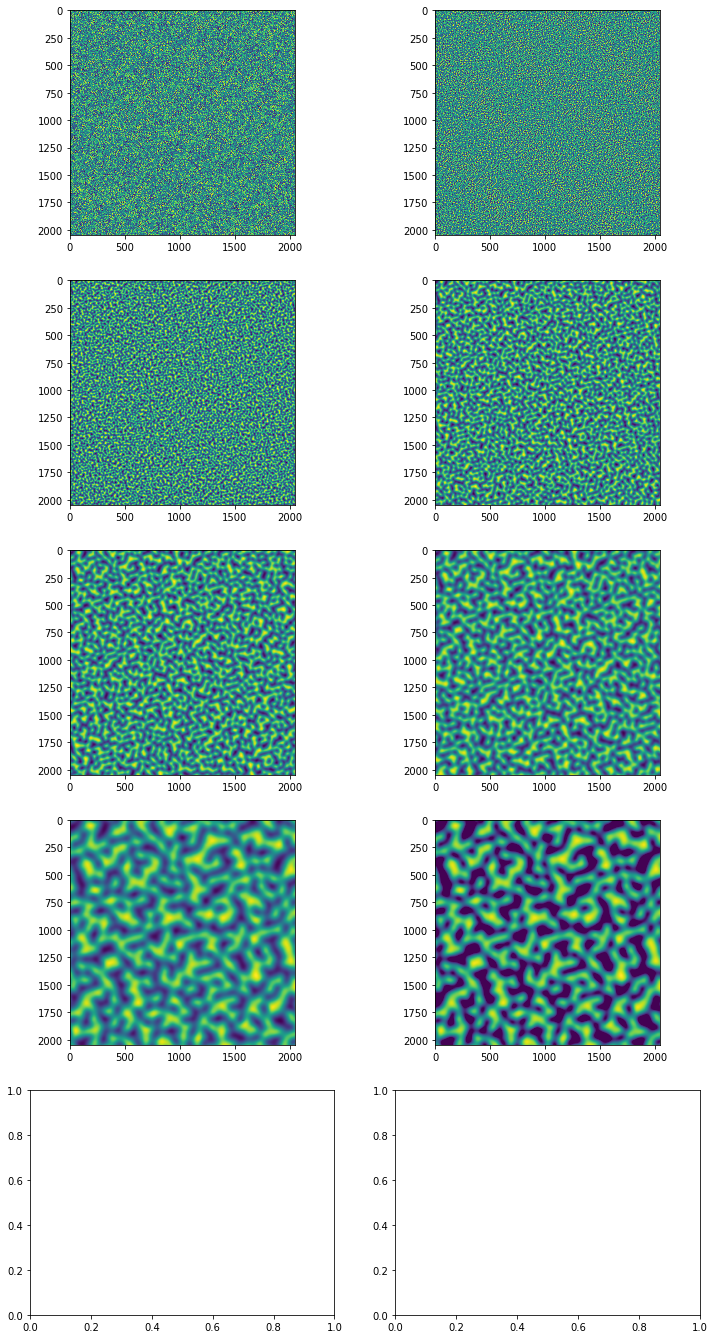

In [53]:
def filaments(generate=False):
    #octaves = (7, 13, 19, 27, 35, 51, 91)
    octaves = (5, 9, 17, 29, 39, 51, 91)
    gen_height = 2048
    gen_width = 2048

    if generate:
        noise = get_sub_noise(gen_height, gen_width, octaves)
        save_noise('seven_octaves_1024.npz', noise)
    else:
        noise = load_noise('seven_octaves_1024.npz')
    
    normnoise = {k:np.interp(v, (v.min(), v.max()), (0, 1)) for k,v in noise.items()}
    fig, ax = plt.subplots(5, 2, figsize=(12,24))
    for ki, k in enumerate(normnoise.keys()):
        r = ki // 2
        c = ki % 2
        ax[r, c].imshow(normnoise[k])
    ks = list(normnoise.keys())
    filament = np.sqrt(normnoise[ks[-1]]).clip(0.5, 1.0)
#     filament_sum = (normnoise[ks[-1]] + normnoise[ks[-2]]) / 2
#     filament_clip = np.sqrt(filament_sum.clip(0.5, 1.0))
#     filament = np.interp(filament_sum, (filament_sum.min(), filament_sum.max()), (0, 1))
#     anti_filament = 1 - filament_sum.clip(0.0, 0.7)
    ax[3, 1].imshow(filament)
#     ax[4, 0].imshow(anti_filament)
    
    
            
filaments(False)